(77414, 63)

In [ ]:
import acquire, wrangle_zillow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import f_oneway
from scipy.stats import levene
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.feature_selection import f_regression, SelectKBest, RFE
from sklearn.linear_model import LinearRegression, LassoLars
from sklearn.preprocessing import PolynomialFeatures

df = wrangle_zillow.zillow_datac()
df.shape

In [2]:
df = wrangle_zillow.get_counties(df)

In [3]:

df.shape

(77414, 26)

In [4]:
df.isnull().sum()

bathroomcnt                         0
bedroomcnt                          0
calculatedbathnbr                3212
calculatedfinishedsquarefeet     1108
fullbathcnt                      3212
garagecarcnt                    54161
hashottuborspa                  76157
latitude                            0
longitude                           0
lotsizesquarefeet                7060
poolcnt                         63196
regionidcity                     1519
regionidzip                       273
roomcnt                             1
yearbuilt                        1166
numberofstories                 59340
structuretaxvaluedollarcnt       1264
taxvaluedollarcnt                 924
landtaxvaluedollarcnt            1606
taxamount                         509
censustractandblock              2090
logerror                            0
transactiondate                     0
LA                                  0
Orange                              0
Ventura                             0
dtype: int64

In [5]:
df = wrangle_zillow.create_features(df)

In [6]:
# dropping more columns


In [7]:
df = wrangle_zillow.remove_outliers(df)
df

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,poolcnt,roomcnt,yearbuilt,structuretaxvaluedollarcnt,...,logerror,LA,Orange,Ventura,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bed_bath_ratio
20,2.0,4.0,3633.0,3.456002,-11.816981,9826.0,NaN,0.0,2005.0,222321.0,...,0.042463,1,0,0,12.0,0.023417,0.225574,61.194880,7.541624,2.000000
28,4.0,5.0,2865.0,3.387922,-11.836143,4990.0,NaN,0.0,1972.0,271704.0,...,0.206470,1,0,0,45.0,0.012578,0.114555,94.835602,112.128257,1.250000
30,2.0,2.0,1090.0,3.397410,-11.842300,40247.0,NaN,0.0,2004.0,232897.0,...,0.021853,1,0,0,13.0,0.017242,0.923944,213.666972,3.097647,1.000000
33,2.0,3.0,2077.0,3.401298,-11.847924,6490.0,NaN,0.0,1926.0,210192.0,...,-0.040807,1,0,0,91.0,0.012253,0.148990,101.199807,67.267797,1.500000
34,3.0,3.0,2019.0,3.400362,-11.847751,6763.0,NaN,0.0,NaN,451786.0,...,-0.018862,1,0,0,NaN,0.011900,0.155257,223.767211,144.864114,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77409,3.0,4.0,1921.0,3.457226,-11.802487,6763.0,NaN,0.0,1990.0,129566.0,...,0.020615,1,0,0,27.0,0.017654,0.155257,67.447163,4.798610,1.333333
77410,3.0,4.0,1780.0,3.457150,-11.803941,6822.0,NaN,0.0,1989.0,100744.0,...,0.013209,1,0,0,28.0,0.019014,0.156612,56.597753,3.690853,1.333333
77411,2.0,3.0,1549.0,3.457533,-11.805427,6987.0,NaN,0.0,1990.0,149241.0,...,0.037129,1,0,0,27.0,0.016744,0.160399,96.346675,7.119937,1.500000
77412,3.0,3.0,1339.0,3.457220,-11.805300,271458.0,NaN,0.0,1990.0,118900.0,...,0.007204,1,0,0,27.0,0.016895,6.231818,88.797610,0.109409,1.000000


In [9]:
# Dropping the rest of the nulls
df.dropna(inplace=True)
df.shape

(67395, 22)

In [10]:
#making sure we dont have any nulls
df.isnull().sum()

bathroomcnt                     0
bedroomcnt                      0
calculatedfinishedsquarefeet    0
latitude                        0
longitude                       0
lotsizesquarefeet               0
roomcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
landtaxvaluedollarcnt           0
taxamount                       0
logerror                        0
LA                              0
Orange                          0
Ventura                         0
age                             0
taxrate                         0
acres                           0
structure_dollar_per_sqft       0
land_dollar_per_sqft            0
bed_bath_ratio                  0
dtype: int64

In [11]:
 X_train, X_validate, X_test, train, train_scaled, y_train, y_validate, y_test, X_train_scaled, X_validate_scaled, X_test_scaled = wrangle_zillow.split_scale(df)

# Cluster 1

- latitude

- longitude

- Bedroom count

     k          sse
0    2  2137.072855
1    3  1633.239988
2    4  1362.131260
3    5  1154.007023
4    6  1011.431077
5    7   884.909929
6    8   788.685679
7    9   703.451548
8   10   629.128124
9   11   584.839237
10  12   544.912455
11  13   507.926808
12  14   478.741123
13  15   448.492938
14  16   424.062883
15  17   407.683086
16  18   385.123263
17  19   370.289940


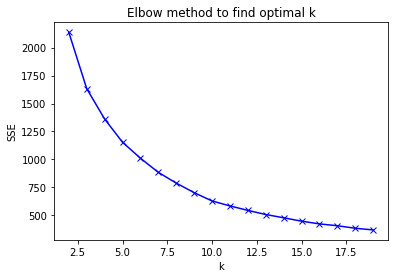

In [12]:
#area_vars = ['bed_bath_ratio','structure_dollar_per_sqft','age']
area_vars = ['latitude','longitude','bedroomcnt']
#area_vars = ['bed_bath_ratio','structure_dollar_per_sqft','age']


wrangle_zillow.elbow_plot(X_train_scaled, cluster_vars=area_vars)

In [13]:

train_clusters, kmeans = wrangle_zillow.run_kmeans(X_train,X_train_scaled,k=5, cluster_vars=area_vars, cluster_col_name='bedbathsqft')

In [14]:
validate_clusters = wrangle_zillow.kmeans_transform(X_validate_scaled, kmeans, cluster_vars=area_vars, cluster_col_name='bedbathsqft')

test_clusters = wrangle_zillow.kmeans_transform(X_test_scaled, kmeans, cluster_vars=area_vars, cluster_col_name='bedbathsqft')

In [15]:
centroids = wrangle_zillow.get_centroids(cluster_vars=area_vars,cluster_col_name='bedbathsqft',kmeans=kmeans)
centroids

,bedbathsqft,centroid_latitude,centroid_longitude,centroid_bedroomcnt
0,0,0.430373,0.691110,0.583598
1,1,0.608159,0.236232,0.406511
2,2,0.456288,0.648984,0.239063
3,3,0.271792,0.846399,0.385741
4,4,0.678882,0.548119,0.396889


In [16]:
X_train, X_train_scaled = wrangle_zillow.add_to_train(train_clusters, centroids, X_train, X_train_scaled, cluster_col_name = 'bedbathsqft')

In [17]:
X_validate, X_validate_scaled = wrangle_zillow.add_to_train(validate_clusters, centroids, X_validate, X_validate_scaled, cluster_col_name = 'bedbathsqft')

In [18]:
X_test, X_test_scaled = wrangle_zillow.add_to_train(test_clusters, centroids, X_test, X_test_scaled, cluster_col_name = 'bedbathsqft')

In [19]:
train, train_scaled = wrangle_zillow.add_to_train(train_clusters, centroids, train, train_scaled, cluster_col_name = 'bedbathsqft')

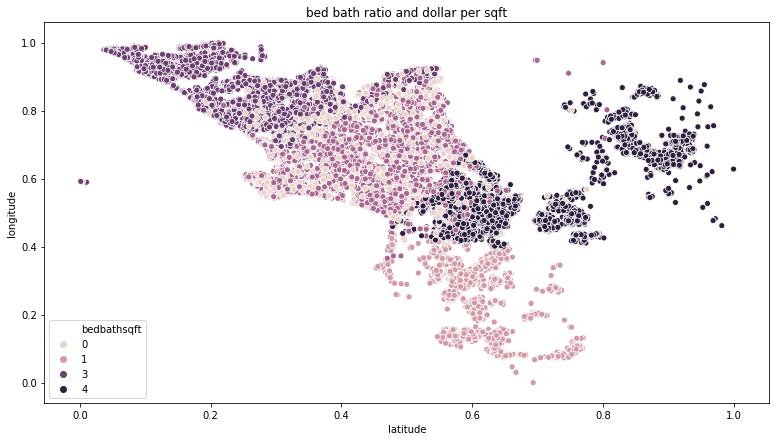

In [20]:
plt.figure(figsize=(13,7))
sns.scatterplot(x='latitude', y='longitude', hue='bedbathsqft', data=X_train_scaled)
plt.title("bed bath ratio and dollar per sqft")
plt.show()

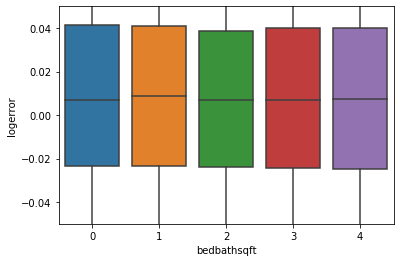

In [21]:
sns.boxplot(X_train_scaled.bedbathsqft, y_train.logerror)
plt.ylim(-.05,.05)
plt.show()

# Bed Bath Square foot Cluster (Cluster 1)

In [22]:
X_train_scaled.groupby(['bedbathsqft'])['latitude','longitude','bedroomcnt'].agg(['mean', 'median', 'std', 'min', 'max'])

latitude                                         longitude  \
                 mean    median       std       min       max      mean   
bedbathsqft                                                               
0            0.430300  0.439181  0.091883  0.004062  0.927918  0.691252   
1            0.608301  0.603860  0.049863  0.453085  0.769846  0.235480   
2            0.456223  0.463008  0.084939  0.000000  0.829116  0.649127   
3            0.271530  0.272503  0.097457  0.000066  0.545212  0.846569   
4            0.678608  0.631507  0.116784  0.477894  1.000000  0.547799   

                                                    bedroomcnt            \
               median       std       min       max       mean    median   
bedbathsqft                                                                
0            0.693216  0.110583  0.358518  1.000000   0.583598  0.500000   
1            0.241289  0.099651  0.000000  0.423533   0.405743  0.333333   
2            0.643247  0.093981  0.355546  0.948073   0.239176  0.166667   
3            0.842877  0.073830  0.589183  0.999480   0.385859  0.333333   
4            0.523458  0.097501  0.389652  0.888672   0.397307  0.333333   

                                      
                  std  min       max  
bedbathsqft                           
0            0.124059  0.5  1.000000  
1            0.145969  0.0  0.833333  
2            0.100424  0.0  0.333333  
3            0.111033  0.0  0.833333  
4            0.113566  0.0  0.833333

**Cluster 0:** Homes with many bedrooms within/around LA County. 

**Cluster 1:** Homes with many bedrooms within/around Orange County.

**Cluster 2:** Homes with less rooms.

**Cluster 3:** Homes with average amount of rooms within/around Ventura County.
    
**Cluster 4:** Homes with average amount of rooms along the Southern and Eastern boundary of LA County.

# Hypothesis Testing
**Null Hypothesis:** Log error is not effected by location

**Alternate Hypothesis:** Log error is effected by location

**Using an ANOVA Test:** Testing for a correlation between a continuous variable among 2 categorical variables

In [23]:
# ANOVA
alpha = .05

cluster_0 = train_scaled[train_scaled.bedbathsqft == 0].logerror
cluster_1 = train_scaled[train_scaled.bedbathsqft == 1].logerror
cluster_2 = train_scaled[train_scaled.bedbathsqft == 2].logerror
cluster_3 = train_scaled[train_scaled.bedbathsqft == 3].logerror
cluster_4 = train_scaled[train_scaled.bedbathsqft == 4].logerror

f,p = f_oneway(cluster_0, cluster_1, cluster_2, cluster_3, cluster_4)
print('p =',p,'\n')
if p < alpha:
    print('We reject the Null Hypothesis')
else:
    print('We fail to reject the Null hypothesis')

p = 0.13612942593396293 

We fail to reject the Null hypothesis


# Cluster 2

- Bed, Bath Ratio

- acres

- Age

     k         sse
0    2  904.694882
1    3  667.280683
2    4  468.108275
3    5  373.489384
4    6  308.025750
5    7  270.559635
6    8  239.885681
7    9  213.532964
8   10  193.677804
9   11  176.546940
10  12  161.156314
11  13  147.076200
12  14  137.256247
13  15  129.313656
14  16  121.920276
15  17  117.748464
16  18  109.783017
17  19  104.521275


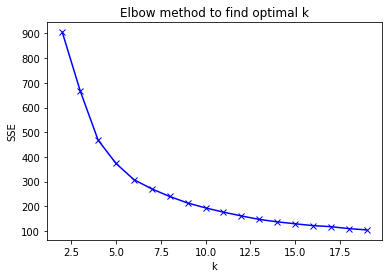

In [24]:
#area_vars = ['bed_bath_ratio','structure_dollar_per_sqft','age']
cluster_col_name = 'ageacres_cluster'
cluster_vars = ['bed_bath_ratio','acres','age']
#area_vars = ['bed_bath_ratio','structure_dollar_per_sqft','age']


wrangle_zillow.elbow_plot(X_train_scaled, cluster_vars)

In [25]:
#k=3

train_clusters, kmeans = wrangle_zillow.run_kmeans(X_train, X_train_scaled, k=3, cluster_vars=cluster_vars, cluster_col_name='ageacres_cluster')

validate_clusters = wrangle_zillow.kmeans_transform(X_validate_scaled, kmeans, cluster_vars=area_vars, cluster_col_name='ageacres_cluster')

test_clusters = wrangle_zillow.kmeans_transform(X_test_scaled, kmeans, cluster_vars=area_vars, cluster_col_name='ageacres_cluster')

In [26]:
centroids = wrangle_zillow.get_centroids(cluster_vars,cluster_col_name='ageacres_cluster',kmeans=kmeans)
centroids

,ageacres_cluster,centroid_bed_bath_ratio,centroid_acres,centroid_age
0,0,0.225239,0.017970,0.506183
1,1,0.124212,0.504994,0.266070
2,2,0.153971,0.032822,0.234613


In [27]:
X_train, X_train_scaled = wrangle_zillow.add_to_train(train_clusters, centroids, X_train, X_train_scaled, cluster_col_name = 'ageacres_cluster')

X_validate, X_validate_scaled = wrangle_zillow.add_to_train(validate_clusters, centroids, X_validate, X_validate_scaled, cluster_col_name = 'ageacres_cluster')

X_test, X_test_scaled = wrangle_zillow.add_to_train(test_clusters, centroids, X_test, X_test_scaled, cluster_col_name = 'ageacres_cluster')

train, train_scaled = wrangle_zillow.add_to_train(train_clusters, centroids, train, train_scaled, cluster_col_name = 'ageacres_cluster')

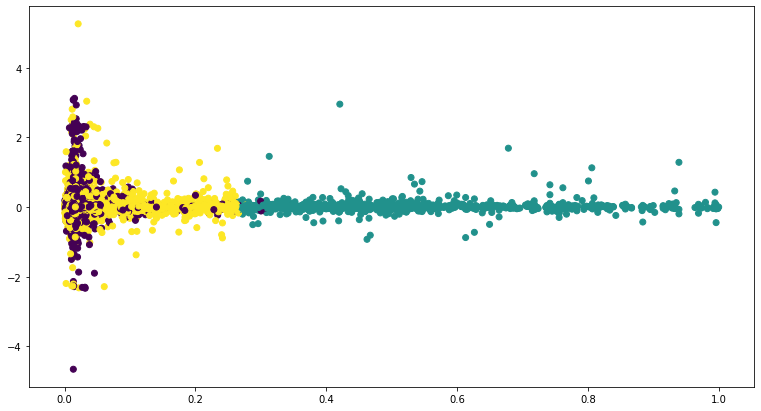

In [28]:
plt.figure(figsize=(13,7))
plt.scatter(X_train_scaled.acres, y_train.logerror, c=X_train_scaled.ageacres_cluster)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

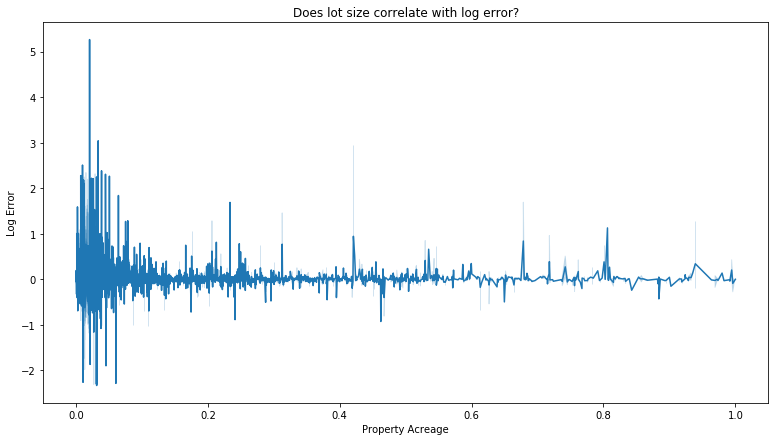

In [29]:
plt.figure(figsize=(13,7))
sns.lineplot(x = X_train_scaled.acres, y = y_train.logerror)
plt.xlabel('Property Acreage')
plt.ylabel('Log Error')
plt.title('Does lot size correlate with log error?')
plt.show

# Age Acres Cluster Identifiers (Cluster 2)

In [30]:
X_train_scaled.groupby(['ageacres_cluster'])['bed_bath_ratio','acres','age'].agg(['mean', 'median', 'std', 'min', 'max'])

bed_bath_ratio                                          \
                           mean    median       std       min       max   
ageacres_cluster                                                          
0                      0.225226  0.185185  0.089284  0.000000  1.000000   
1                      0.124234  0.111111  0.049719  0.012346  0.407407   
2                      0.153968  0.160494  0.052922  0.000000  0.555556   

                     acres                                               age  \
                      mean    median       std       min       max      mean   
ageacres_cluster                                                               
0                 0.017971  0.014655  0.016476  0.000361  0.347981  0.506166   
1                 0.505392  0.462334  0.187947  0.263295  1.000000  0.266381   
2                 0.032855  0.016006  0.045497  0.000000  0.281568  0.234563   

                                                          
                    median       std       min       max  
ageacres_cluster                                          
0                 0.477941  0.105772  0.316176  1.000000  
1                 0.272059  0.083022  0.007353  0.661765  
2                 0.242647  0.090421  0.000000  0.404412

**Cluster 0:** Older houses on smaller lot.

**Cluster 1:** Fairly old houses on large lot.

**Cluster 2:** Newer Homes on smaller lot.


# Hypothesis Testing (Cluster 2)
**Null Hypothesis:** Lot size is not related to log error

**Alternate Hypothesis:** Lot size has an effect on log error

In [31]:
# ANOVA
alpha = .05

cluster_0 = train_scaled[train_scaled.ageacres_cluster == 0].logerror
cluster_1 = train_scaled[train_scaled.ageacres_cluster == 1].logerror
cluster_2 = train_scaled[train_scaled.ageacres_cluster == 2].logerror


f,p = f_oneway(cluster_0, cluster_1, cluster_2)
print('p =',p,'\n')
if p < alpha:
    print('We reject the Null Hypothesis')
else:
    print('We fail to reject the Null hypothesis')

p = 0.9406976276215464 

We fail to reject the Null hypothesis


# Cluster 3
- Home Size

- Lot Size

     k         sse
0    2  549.989381
1    3  297.914911
2    4  197.476882
3    5  154.282295
4    6  117.201271
5    7   95.112008
6    8   80.115209
7    9   67.433713
8   10   59.220948
9   11   53.631376
10  12   48.604544
11  13   44.994264
12  14   41.404808
13  15   38.581594
14  16   36.110282
15  17   33.935491
16  18   31.967502
17  19   30.473618


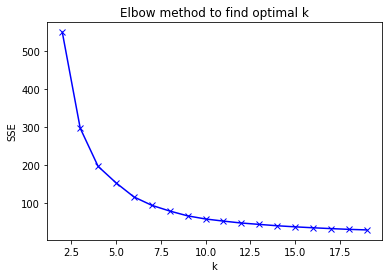

In [32]:
#area_vars = ['bed_bath_ratio','structure_dollar_per_sqft','age']
cluster_col_name = 'area_cluster'
cluster_vars = ['calculatedfinishedsquarefeet','lotsizesquarefeet']
#area_vars = ['bed_bath_ratio','structure_dollar_per_sqft','age']


wrangle_zillow.elbow_plot(X_train_scaled, cluster_vars)

In [33]:
k=2
train_clusters, kmeans = wrangle_zillow.run_kmeans(X_train, X_train_scaled, k=4, cluster_vars=cluster_vars, cluster_col_name='area_cluster')

validate_clusters = wrangle_zillow.kmeans_transform(X_validate_scaled, kmeans, cluster_vars=cluster_vars, cluster_col_name='area_cluster')

test_clusters = wrangle_zillow.kmeans_transform(X_test_scaled, kmeans, cluster_vars=cluster_vars, cluster_col_name='area_cluster')

In [34]:
centroids = wrangle_zillow.get_centroids(cluster_vars,cluster_col_name='area_cluster',kmeans=kmeans)
centroids

,area_cluster,centroid_calculatedfinishedsquarefeet,centroid_lotsizesquarefeet
0,0,0.144560,0.023353
1,1,0.151240,0.506496
2,2,0.289350,0.022081
3,3,0.527176,0.038284


In [35]:
X_train, X_train_scaled = wrangle_zillow.add_to_train(train_clusters, centroids, X_train, X_train_scaled, cluster_col_name = 'area_cluster')

X_validate, X_validate_scaled = wrangle_zillow.add_to_train(validate_clusters, centroids, X_validate, X_validate_scaled, cluster_col_name = 'area_cluster')

X_test, X_test_scaled = wrangle_zillow.add_to_train(test_clusters, centroids, X_test, X_test_scaled, cluster_col_name = 'area_cluster')

train, train_scaled = wrangle_zillow.add_to_train(train_clusters, centroids, train, train_scaled, cluster_col_name = 'area_cluster')

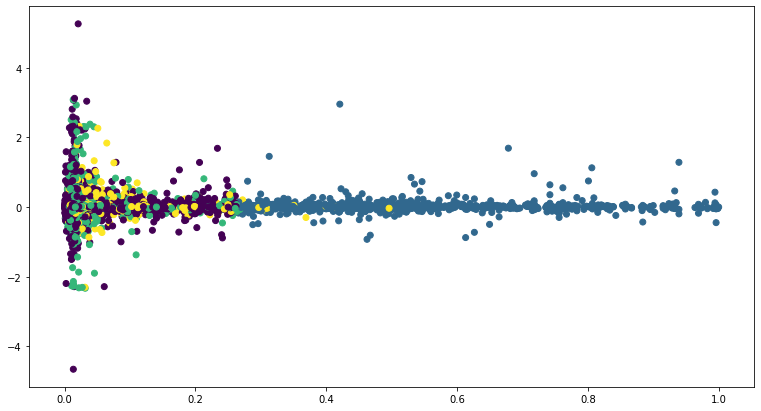

In [36]:
plt.figure(figsize=(13,7))
plt.scatter(X_train_scaled.lotsizesquarefeet, y_train.logerror, c=X_train_scaled.area_cluster)
plt.show()

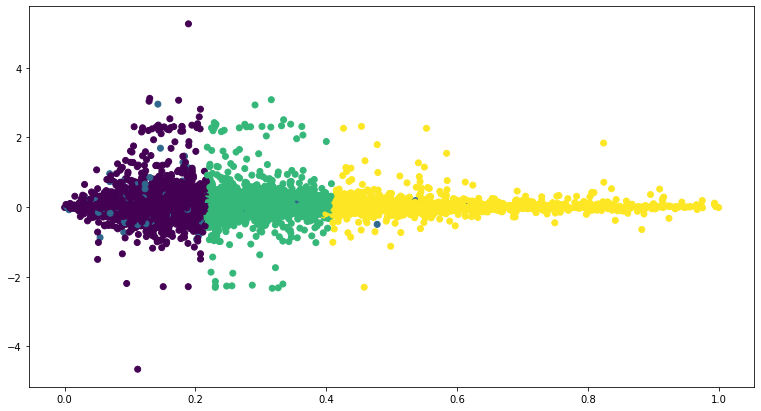

In [37]:
plt.figure(figsize=(13,7))
plt.scatter(X_train_scaled.calculatedfinishedsquarefeet, y_train.logerror, c=X_train_scaled.area_cluster)
plt.show()

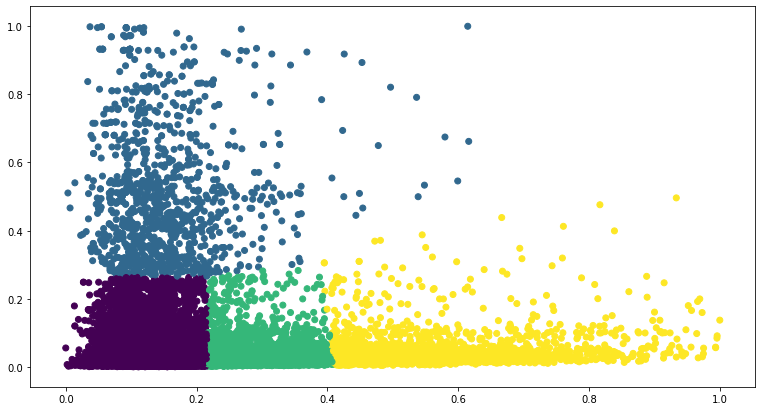

In [38]:
plt.figure(figsize=(13,7))
plt.scatter(X_train_scaled.calculatedfinishedsquarefeet, X_train_scaled.lotsizesquarefeet, c=X_train_scaled.area_cluster)

<function matplotlib.pyplot.show(*args, **kw)>

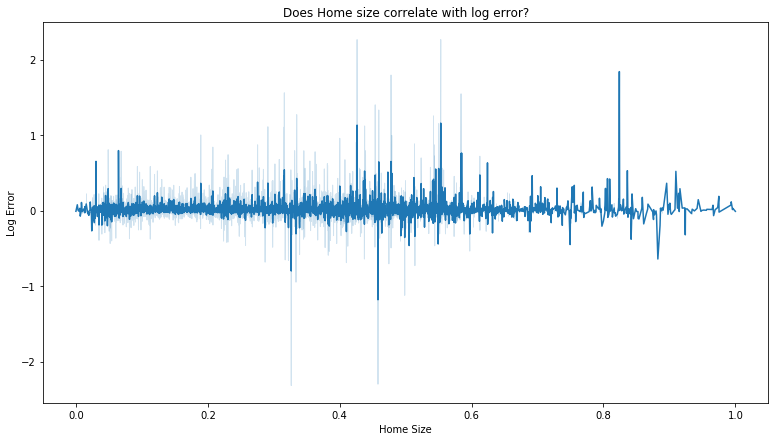

In [39]:
plt.figure(figsize=(13,7))
sns.lineplot(x = X_train_scaled.calculatedfinishedsquarefeet, y = y_train.logerror)
plt.xlabel('Home Size')
plt.ylabel('Log Error')
plt.title('Does Home size correlate with log error?')
plt.show

# Area Cluster Identifiers (Cluster 3)

In [40]:
X_train_scaled.groupby(['area_cluster'])['calculatedfinishedsquarefeet', 'lotsizesquarefeet'].agg(['mean', 'median', 'std', 'min', 'max'])

calculatedfinishedsquarefeet                                \
                                     mean    median       std       min   
area_cluster                                                              
0                                0.144420  0.146525  0.042544  0.000000   
1                                0.151240  0.136316  0.078620  0.003303   
2                                0.288913  0.279838  0.051536  0.216784   
3                                0.526455  0.488215  0.116150  0.395286   

                       lotsizesquarefeet                                \
                   max              mean    median       std       min   
area_cluster                                                             
0             0.216934          0.023354  0.014103  0.034779  0.000000   
1             0.616124          0.506496  0.464418  0.188626  0.265866   
2             0.409098          0.022088  0.016130  0.024129  0.001346   
3             1.000000          0.038167  0.022907  0.046655  0.003816   

                        
                   max  
area_cluster            
0             0.262778  
1             1.000000  
2             0.282912  
3             0.496069

**Cluster 0:** Small House on a small lot.

**Cluster 1:** Small House on large lot.

**Cluster 2:** Medium sized house on small lot.

**Cluster 3:** Large House on small lot.

# Hypothesis Testing (Cluster 3)
**Null Hypothesis:** Home size does not determine log error

**Alternate Hypothesis:** Home size is correlated with log error

In [41]:
# ANOVA
alpha = .05

cluster_0 = train_scaled[train_scaled.area_cluster == 0].logerror
cluster_1 = train_scaled[train_scaled.area_cluster == 1].logerror
cluster_2 = train_scaled[train_scaled.area_cluster == 2].logerror
cluster_3 = train_scaled[train_scaled.area_cluster == 3].logerror

f,p = f_oneway(cluster_0, cluster_1, cluster_2)
print('p =',p,'\n')
if p < alpha:
    print('We reject the Null Hypothesis')
else:
    print('We fail to reject the Null hypothesis')

p = 0.795312720244878 

We fail to reject the Null hypothesis


# Explore Takeaways

- Clusters that were tested did not have a correlation to log error.

- More time would be needed to determine cluster significance.

# Modeling

In [42]:
X_train_scaled.shape, X_validate_scaled.shape, X_test_scaled.shape

((37741, 32), (16175, 32), (13479, 32))

**Using KBest and RFE to select features**

In [51]:
# SelectKBest

top5 = SelectKBest(f_regression, k=5).fit(X_train_scaled, y_train)
top5_support = top5.get_support()
X_train_scaled.loc[:,top5_support].columns.tolist()

['bathroomcnt',
 'bedroomcnt',
 'taxrate',
 'bed_bath_ratio',
 'centroid_bedroomcnt']

In [53]:
# RFE

# Start it
lm = LinearRegression()  

# Create it
rfe = RFE(lm, 5)

# Fit it
rfe.fit(X_train_scaled,y_train)  

feature_mask = rfe.support_

rfe_feature = X_train.iloc[:,feature_mask].columns.tolist()

print('RFE Selects:')
rfe_feature

RFE Selects:


['yearbuilt', 'LA', 'Orange', 'Ventura', 'age']

# Establishing a Baseline

In [57]:
mean = y_train.mean()
median = y_train.median()
print('Log Error Mean Value:',mean,'\n')
print('Log Error Median Value:',median,'\n')

Log Error Mean Value: logerror    0.017154
dtype: float64 

Log Error Median Value: logerror    0.00709
dtype: float64 

Going with the Mean Value as a baseline


Text(0.5, 1.0, 'Log Error Distribution')

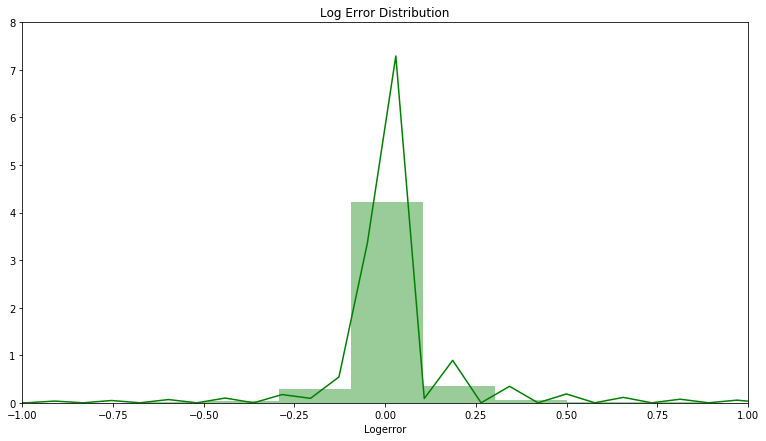

In [65]:
plt.figure(figsize=(13,7))
sns.distplot(y_train, color='green', axlabel = 'Logerror')
plt.xlim(-1,1)
plt.ylim(0, 8)
plt.title("Log Error Distribution")

In [67]:
baseline_rmse = mean_squared_error(y_train, np.full(37741, np.mean(y_train)))**(1/2)
print (f'The baseline_rmse is {baseline_rmse}')

The baseline_rmse is 0.17165954261734112


**Not a bad distribution, going with the Log Error mean value**

In [66]:
# Time to remodel some variables with the chosen features selected above

X_train_scaled = X_train_scaled[['centroid_bedroomcnt', 'bed_bath_ratio', 'age', 'yearbuilt']]
X_validate_scaled = X_validate_scaled[['centroid_bedroomcnt', 'bed_bath_ratio', 'age', 'yearbuilt']]
X_test_scaled = X_test_scaled[['centroid_bedroomcnt', 'bed_bath_ratio', 'age', 'yearbuilt']]

X_train_scaled.shape, X_validate_scaled.shape, X_test_scaled.shape

((37741, 4), (16175, 4), (13479, 4))

# Model 1 - Linear Regression

In [75]:
# Make it
lm = LinearRegression(normalize=True)
# Fit it
lm.fit(X_train_scaled, y_train)
# predict it
lm_pred = lm.predict(X_train_scaled)
# Compute it
lm_rmse = mean_squared_error(y_train, lm_pred)**(1/2)

print('The LM RMSE is:', lm_rmse)
if lm_rmse < baseline_rmse:
    print('The LM RMSE beat the baseline')
else:
    print('The baseline beat the LM RMSE')

The LM RMSE is: 0.1213697746379772
The LM RMSE beat the baseline


# Model 2 - Polynomial Features

In [79]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
pftrain = pf.fit_transform(X_train_scaled)

# create the model object
lmpf = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lmpf.fit(pftrain, y_train)

# predict train
#y_train['poly'] = lmpf.predict(pftrain)

lm_squared_pred = lmpf.predict(pftrain)

# evaluate: rmse
rmse_train = mean_squared_error(y_train, lm_squared_pred)**1/2

print('The LM Squared RMSE is:', rmse_train)
if rmse_train < baseline_rmse:
    print('The LM Squared RMSE beat the baseline')
else:
    print('The baseline beat the LM squared RMSE')

The LM Squared RMSE is: 0.0073640170618770005
The LM Squared RMSE beat the baseline


# Model 3 - LassoLars

In [81]:
# Make it
lars = LassoLars(alpha=1)
# Fit it
lars.fit(X_train_scaled, y_train)
# Predict it
lars_pred = lars.predict(X_train_scaled)
# Compute it
lars_rmse = mean_squared_error(y_train, lars_pred)**(1/2)
lars_rmse

print('The LassoLars RMSE is:', lars_rmse)
if lars_rmse < baseline_rmse:
    print('The LassoLars RMSE beat the baseline')
else:
    print('The baseline beat the LassoLars RMSE')

The LassoLars RMSE is: 0.1213931328102853
The LassoLars RMSE beat the baseline


# Model 4 - Linear Regression with all Features

In [85]:
# Make it
lm = LinearRegression(normalize=True)
# Fit it
lm.fit(X_train, y_train)
# predict it
lm_pred = lm.predict(X_train)
# Compute it
lm_rmse = mean_squared_error(y_train, lm_pred)**(1/2)

print('The LM RMSE is:', lm_rmse)
if lm_rmse < baseline_rmse:
    print('The LM RMSE beat the baseline')
else:
    print('The baseline beat the LM RMSE')

The LM RMSE is: 0.12133799917750818
The LM RMSE beat the baseline


# Moving to Validate with the top 2 models
-Linear Regression with the selected features

-Polynomial Features to the 2nd Degree

In [87]:
# Make it
lm = LinearRegression(normalize=True)
# Fit it
lm.fit(X_validate_scaled, y_validate)
# predict it
lm_pred = lm.predict(X_validate_scaled)
# Compute it
lm_rmse = mean_squared_error(y_validate, lm_pred)**(1/2)

print('The LM RMSE is:', lm_rmse)
if lm_rmse < baseline_rmse:
    print('The LM RMSE beat the baseline')
else:
    print('The baseline beat the LM RMSE')

The LM RMSE is: 0.1722135312377993
The baseline beat the LM RMSE


In [88]:
#Make it
pf = PolynomialFeatures(degree=2)

#Fit it
pftrain = pf.fit_transform(X_validate_scaled)

#Make the LM
lmpf = LinearRegression(normalize=True)

lmpf.fit(pftrain, y_validate)

lm_squared_pred = lmpf.predict(pftrain)

rmse_train = mean_squared_error(y_validate, lm_squared_pred)**1/2

print('The LM Squared RMSE is:', rmse_train)
if rmse_train < baseline_rmse:
    print('The LM Squared RMSE beat the baseline')
else:
    print('The baseline beat the LM squared RMSE')

The LM Squared RMSE is: 0.014825455030054432
The LM Squared RMSE beat the baseline


# Moving on to Test with the Top Performing Model
- Polynomial Features to the 2nd Degree

In [89]:
#Make it
pf = PolynomialFeatures(degree=2)

#Fit it
pftrain = pf.fit_transform(X_test_scaled)

#Make the LM
lmpf = LinearRegression(normalize=True)

lmpf.fit(pftrain, y_test)

lm_squared_pred = lmpf.predict(pftrain)

rmse_train = mean_squared_error(y_test, lm_squared_pred)**1/2

print('The LM Squared RMSE is:', rmse_train)
if rmse_train < baseline_rmse:
    print('The LM Squared RMSE beat the baseline')
else:
    print('The baseline beat the LM squared RMSE')

The LM Squared RMSE is: 0.013767198972711217
The LM Squared RMSE beat the baseline


# The top performing model that beat the baseline is Polynomial Features to the 2nd Degree.
- Features Selected are:
    - centroid_bedroomcnt
    - bed_bath_ratio
    - age
    - yearbuilt

**This model beat the baseline by 91.8%**